## J-V curve of a solar cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

### Ideal cell

In [2]:
# saturation current density [mA/cm2]
Jo = 1.95e-10

# photo-current density [mA/cm2]
Jph = 40

# voltage range
U = np.arange(0, 0.69, 0.01)

# Boltzman's constant [J/K]
k = 1.38e-23

# elementary charge [C]
q = 1.602e-19

# temperature [K]
T = 300

# current density
J = [Jph - Jo*(np.exp(q*j/(k*T))-1) for j in U]

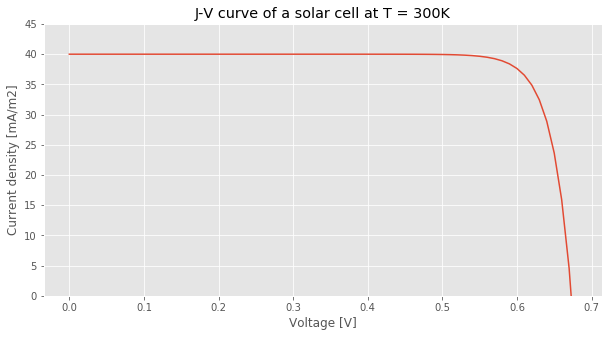

In [3]:
plt.figure(figsize=(10,5))
plt.plot(U, J)
plt.xlabel('Voltage [V]')
plt.ylabel('Current density [mA/m2]')
plt.ylim(0,Jph+5)
plt.title('J-V curve of a solar cell at T = 300K');

### Inclusion of paracitic resistances

In [4]:
# inclustion of parasitic effects

# shunt resistance [Ohm]
Rsh = 0.1

# series resistance [Ohm]
Rs = 1e-4

Jr = 40
Jrf =[]
for j in range(len(U)):
    for i in range(5):
        Jr = Jph - Jo*(np.exp(q*(U[j]+Jr*Rs)/(k*T))-1) - (U[j]+Jr*Rs)/Rsh
    Jrf.append(Jr)

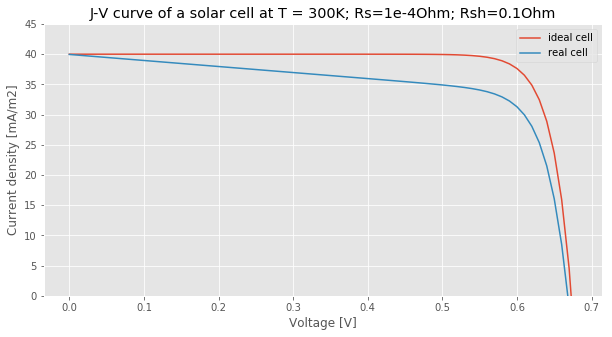

In [5]:
plt.figure(figsize=(10,5))
plt.plot(U, J, label='ideal cell')
plt.plot(U,Jrf, label='real cell')
plt.xlabel('Voltage [V]')
plt.ylabel('Current density [mA/m2]')
plt.ylim(0,Jph+5)
plt.legend()
plt.title('J-V curve of a solar cell at T = 300K; Rs=1e-4Ohm; Rsh=0.1Ohm');

In [6]:
# writing function to simulate influence of parasitic resistances

def calJ(Rs, Rsh, U):
    # shunt resistance [Ohm]
    Rsh = Rsh

    # series resistance [Ohm]
    Rs = Rs

    Jr = 40
    Jrf =[]
    for j in range(len(U)):
        for i in range(5):
            Jr = Jph - Jo*(np.exp(q*(U[j]+Jr*Rs)/(k*T))-1) - (U[j]+Jr*Rs)/Rsh
        Jrf.append(Jr)
    
    return Jrf

### Influence of series resistance change on J-V curve

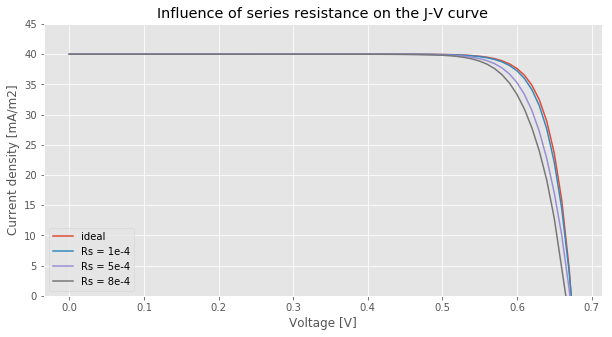

In [7]:
plt.figure(figsize=(10,5))
plt.plot(U, J, label='ideal')
plt.plot(U,calJ(1e-4, 100, U), label='Rs = 1e-4')
plt.plot(U,calJ(5e-4, 100, U), label='Rs = 5e-4')
plt.plot(U,calJ(8e-4, 100, U), label='Rs = 8e-4')
plt.xlabel('Voltage [V]')
plt.ylabel('Current density [mA/m2]')
plt.ylim(0,Jph+5)
plt.legend()
plt.title('Influence of series resistance on the J-V curve');

### Influence of shunt resistance change on J-V curve

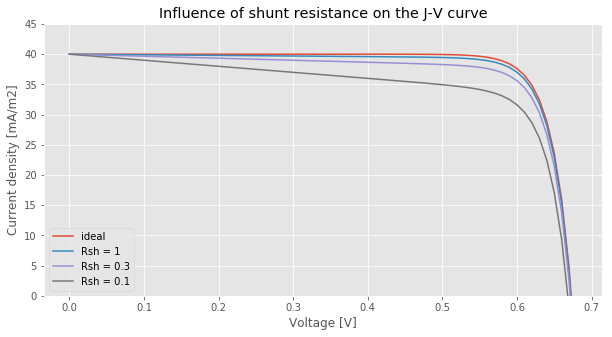

In [8]:
plt.figure(figsize=(10,5))
plt.plot(U, J, label='ideal')
plt.plot(U,calJ(1e-6, 1, U), label='Rsh = 1')
plt.plot(U,calJ(1e-6, 0.3, U), label='Rsh = 0.3')
plt.plot(U,calJ(1e-6, 0.1, U), label='Rsh = 0.1')
plt.xlabel('Voltage [V]')
plt.ylabel('Current density [mA/m2]')
plt.ylim(0,Jph+5)
plt.legend()
plt.title('Influence of shunt resistance on the J-V curve');

### Maximum Power Point (MPP) and fill factor (FF)

In [9]:
# power density [mW/m2]
P = np.array(J) * U

# max power density
Pm = max(P)

# corresponding voltage and current density for MPP
n = np.argmax(P)
Umpp = U[n]
Jmpp = J[n]

Umpp, Jmpp

(0.58999999999999997, 38.396139997942605)

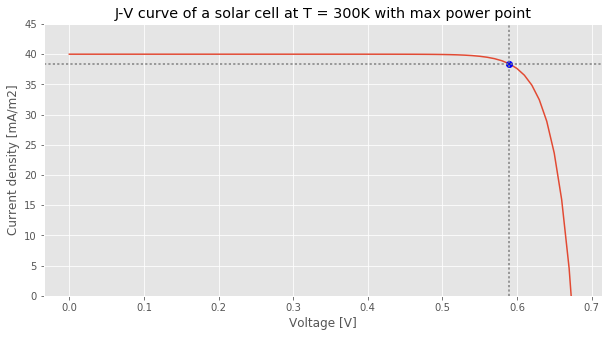

In [10]:
plt.figure(figsize=(10,5))
plt.plot(U, J)
plt.plot([Umpp], [Jmpp], marker='o', markersize=6, color='blue')
plt.axvline(x=Umpp, color='grey', linestyle=':')
plt.axhline(Jmpp, color='grey', linestyle=':')
plt.xlabel('Voltage [V]')
plt.ylabel('Current density [mA/m2]')
plt.ylim(0,Jph+5)
plt.title('J-V curve of a solar cell at T = 300K with max power point');

#### Fill factor

In [11]:
from solarenergy.functions import openCirVoltage

Uoc = openCirVoltage(Jph, Jo, T)
Jsc = Jph

# fill factor
FF = Umpp * Jmpp / (Uoc * Jsc)
FF

0.84136743344291143

### Power density curve

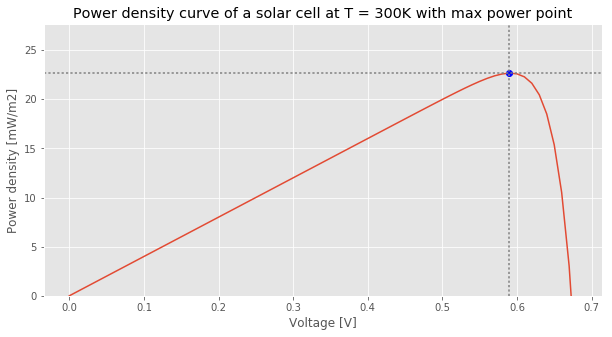

In [12]:
plt.figure(figsize=(10,5))
plt.plot(U, P)
plt.plot([Umpp], [Pm], marker='o', markersize=6, color='blue')
plt.axvline(x=Umpp, color='grey', linestyle=':')
plt.axhline(Pm, color='grey', linestyle=':')
plt.xlabel('Voltage [V]')
plt.ylabel('Power density [mW/m2]')
plt.ylim(0,Pm+5)
plt.title('Power density curve of a solar cell at T = 300K with max power point');

### Power density and J-V curve on one figure

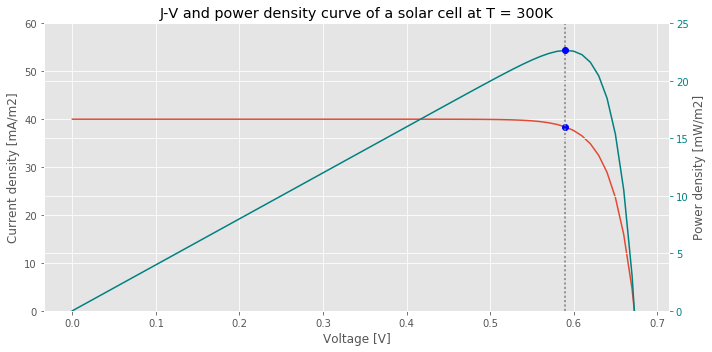

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(U, J)
ax1.plot([Umpp], [Jmpp], marker='o', markersize=6, color='blue')
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Current density [mA/m2]')
ax1.set_ylim(0, 60)
ax1.axvline(x=Umpp, color='grey', linestyle=':')

ax2 = ax1.twinx()
ax2.plot(U, P, color='teal')
ax2.plot([Umpp], [Pm], marker='o', markersize=6, color='blue')
ax2.set_ylabel('Power density [mW/m2]')
ax2.set_ylim(0, 25)
ax2.tick_params('y', colors='teal')
plt.title('J-V and power density curve of a solar cell at T = 300K')

fig.tight_layout();